In [106]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error


import warnings
warnings.simplefilter("ignore")

In [107]:
#Quarter 1
dataset_2016_Q1 = pd.read_csv('Datasets/quarter2/Divvy_Trips_2015_Q2.csv')
'''
#Quarter 2 
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
#Quarter 3 
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
#Quarter 4 
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')
'''

"\n#Quarter 2 \ndataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')\ndataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')\ndataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')\ndataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])\n#Quarter 3 \ndataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')\n#Quarter 4 \ndataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')\n"

In [108]:
dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)
'''
dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)
dataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)
dataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)
dataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)
dataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)
'''

"\ndataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)\ndataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)\ndataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)\ndataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)\ndataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)\ndataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)\n"

In [109]:
#dataset_2016_full=pd.concat([dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])
dataset_2016_full=pd.concat([dataset_2016_Q1])

In [110]:
data_2016 = pd.DataFrame(dataset_2016_full.groupby(dataset_2016_full['starttime'].dt.date).count()['trip_id'])
data_2016.columns = ['checkout']

In [111]:
data_2016.head()

,checkout
starttime,
2015-04-01,6203
2015-04-02,4313
2015-04-03,4034
2015-04-04,4860
2015-04-05,5194


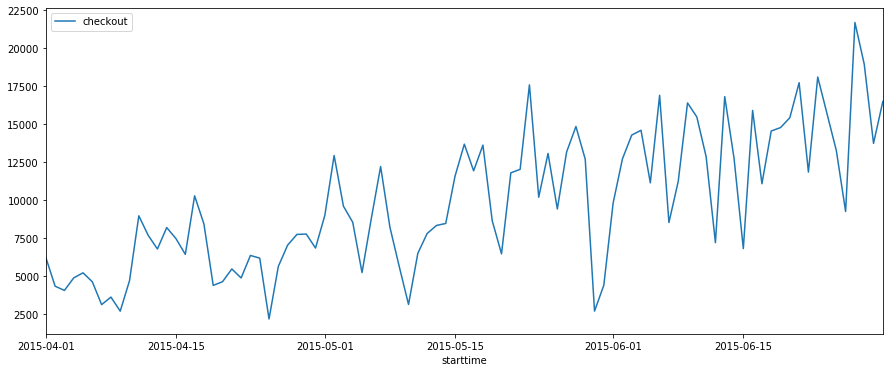

In [112]:
data_2016.plot()
plt.show()

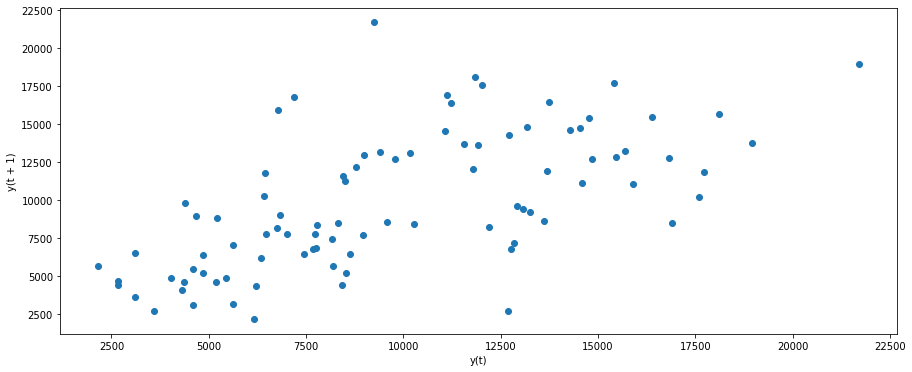

In [113]:
lag_plot(data_2016)
plt.show()

In [114]:

# correlation 
values = pd.DataFrame(data_2016.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.626736
t+1  0.626736  1.000000


# autocorrelation_plot

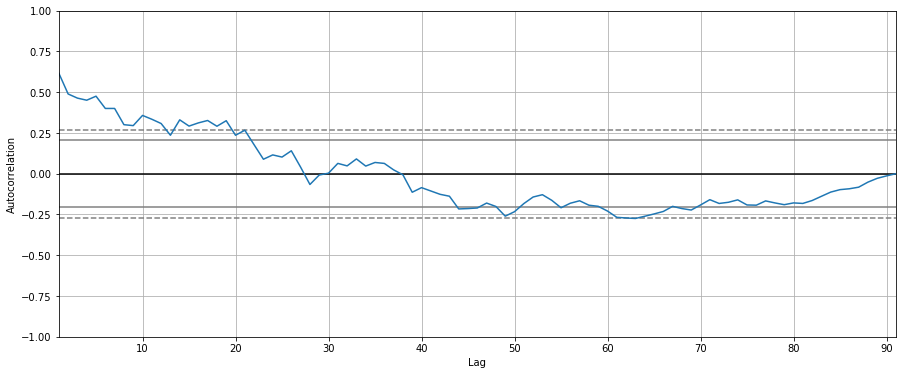

In [115]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data_2016)
plt.show()

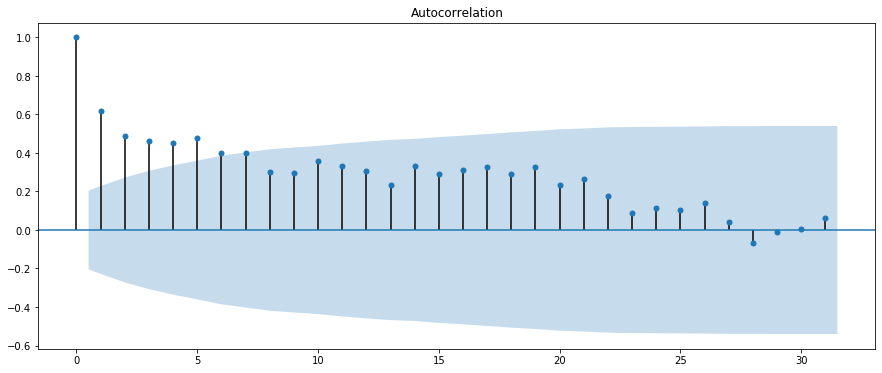

In [116]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(data_2016, lags=31)
plt.show()

Test MSE: 33310085.556


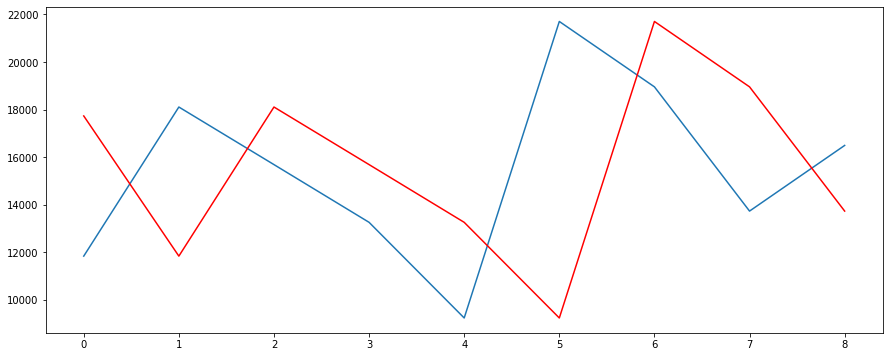

In [117]:

from sklearn.metrics import mean_squared_error
values = pd.DataFrame(data_2016.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-100], X[len(X)-100:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='red')
plt.show()

Lag: 11
Coefficients: [ 1.78185000e+03  3.86250692e-01  1.43908283e-02  4.25459116e-02
  4.21960775e-02  2.07741411e-01 -1.16432939e-01  1.22303487e-01
 -2.83413731e-02 -1.07521169e-01  2.94733370e-01  8.54479835e-03]
predicted=11430.521506, expected=11838.000000
predicted=14862.193525, expected=18106.000000
predicted=14543.826158, expected=15685.000000
predicted=12197.518266, expected=13258.000000
predicted=14653.939112, expected=9237.000000
predicted=12475.317451, expected=21703.000000
predicted=14225.644379, expected=18954.000000
predicted=13600.183402, expected=13731.000000
predicted=13488.187626, expected=16491.000000
Absoulte error 3151.0607554328867
Test MSE: 17666657.222


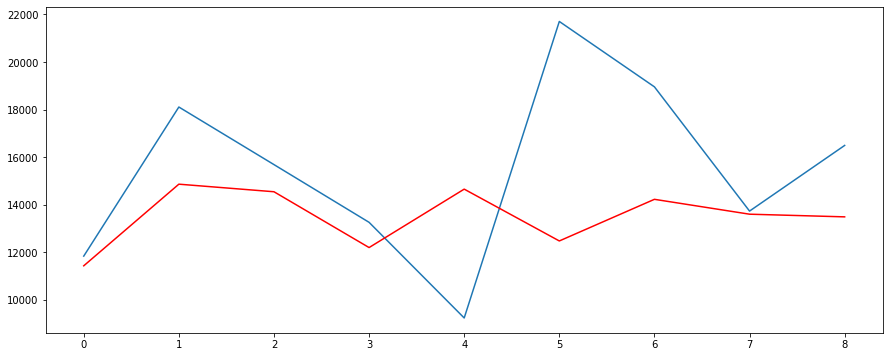

In [118]:

from statsmodels.tsa.ar_model import AR


# split dataset
X = data_2016.values
train, test = X[1:len(X)-100], X[len(X)-100:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
error_2 = mean_absolute_error(test, predictions)
print('Absoulte error',error_2)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## For Q1 all years , station =91

In [119]:
#Quarter 1
dataset_2015_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2015_Q1.csv')
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
dataset_2017_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2017_Q1.csv')
dataset_2018_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2018_Q1.csv')



In [120]:
dataset_2015_Q1['starttime'] = pd.to_datetime(dataset_2015_Q1['starttime'],infer_datetime_format=True)
dataset_2015_Q1['stoptime'] = pd.to_datetime(dataset_2015_Q1['stoptime'],infer_datetime_format=True)

dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)

dataset_2017_Q1['starttime'] = pd.to_datetime(dataset_2017_Q1['starttime'],infer_datetime_format=True)
dataset_2017_Q1['stoptime'] = pd.to_datetime(dataset_2017_Q1['stoptime'],infer_datetime_format=True)

dataset_2018_Q1['starttime'] = pd.to_datetime(dataset_2018_Q1['starttime'],infer_datetime_format=True)
dataset_2018_Q1['stoptime'] = pd.to_datetime(dataset_2018_Q1['stoptime'],infer_datetime_format=True)

In [121]:
# station 91 in all year Q1 
df_particular_Stn = dataset_2015_Q1[(dataset_2015_Q1.from_station_id==91)]
dt_m  = pd.DataFrame(dataset_2015_Q1.groupby(dataset_2015_Q1['starttime'].dt.date).count()['trip_id'])
df_p_15=pd.DataFrame(df_particular_Stn.groupby(df_particular_Stn['starttime'].dt.date).count()['trip_id'])
df_p_15.head(100)
print(dt_m.shape)

df_particular_Stn_16 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==91)]
df_p_16=pd.DataFrame(df_particular_Stn_16.groupby(df_particular_Stn_16['starttime'].dt.date).count()['trip_id'])

df_particular_Stn_17 = dataset_2017_Q1[(dataset_2017_Q1.from_station_id==91)]
df_p_17=pd.DataFrame(df_particular_Stn_17.groupby(df_particular_Stn_17['starttime'].dt.date).count()['trip_id'])

df_particular_Stn_18 = dataset_2018_Q1[(dataset_2018_Q1.from_station_id==91)]
df_p_18=pd.DataFrame(df_particular_Stn_18.groupby(df_particular_Stn_18['starttime'].dt.date).count()['trip_id'])



(90, 1)


In [122]:
frames =[df_p_15,df_p_16,df_p_17,df_p_18]
Final_df=pd.concat(frames)
Final_df.fillna(0, inplace=True)



Final_df_md=Final_df
#Final_df_md['trip_id'] 


Final_df_md = Final_df_md[Final_df_md.trip_id > 10]

#Final_df_md.head()
Final_df_md.shape
Final_df_md.to_excel('Final_df_md.xlsx')

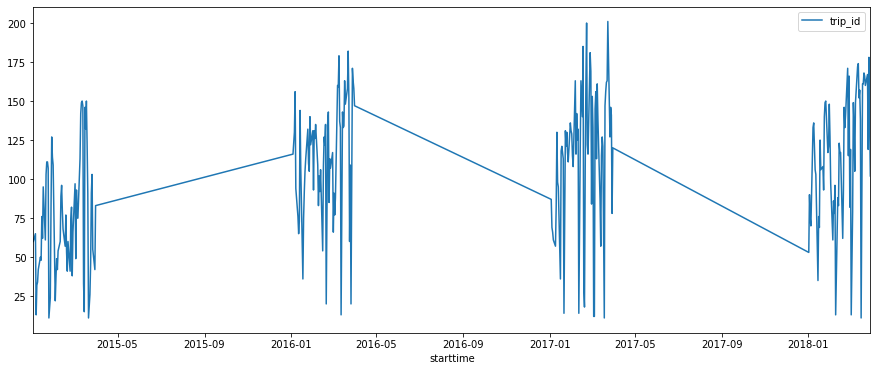

In [123]:
Final_df_md.plot()
plt.show()

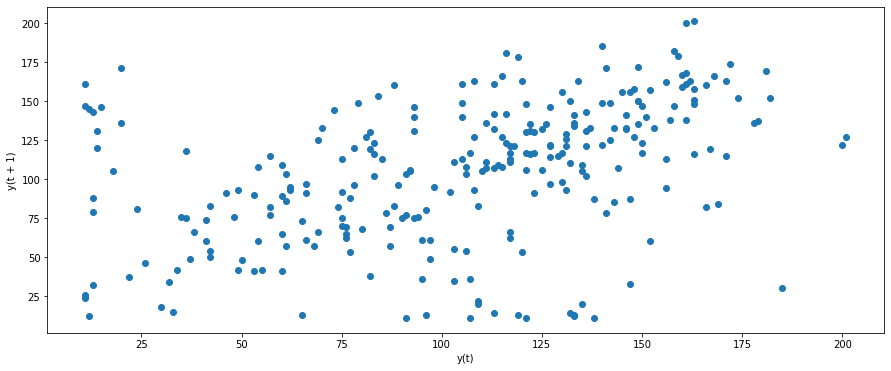

In [124]:
lag_plot(Final_df_md)
plt.show()

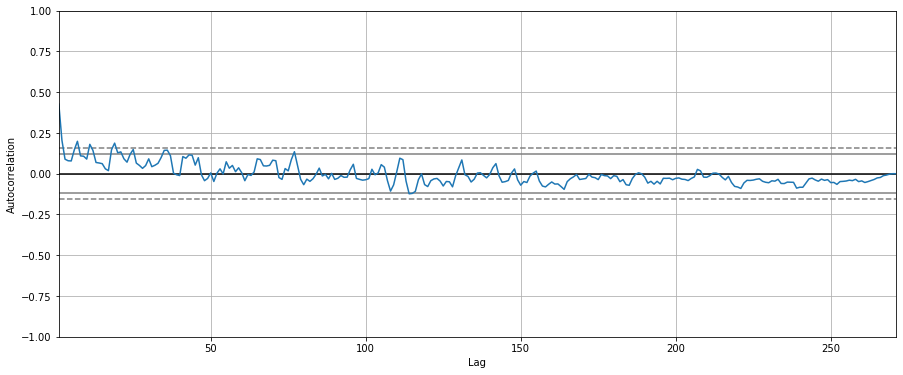

In [125]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(Final_df_md)
plt.show()

Test MSE: 2079.063


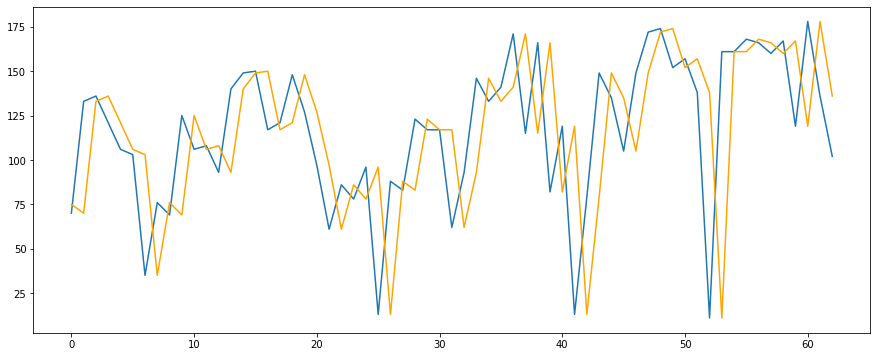

In [126]:

from sklearn.metrics import mean_squared_error
values = pd.DataFrame(Final_df_md.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
# split into train and test sets
X = dataframe.values
train, test = X[1:len(X)-63], X[len(X)-63:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
 
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions vs expected
plt.plot(test_y)
plt.plot(predictions, color='orange')
plt.show()

Lag: 14
Coefficients: [ 3.62408130e+01  3.80902490e-01 -4.88820830e-02 -3.66478627e-02
 -5.50921889e-03 -4.37187578e-02  1.03188821e-01  1.48477194e-01
 -4.75431103e-02  1.11256923e-01 -1.02964364e-01  1.79828989e-01
  8.87113806e-02 -1.01459119e-01  2.85875827e-02]
predicted=118.535620, expected=70.000000
predicted=116.423254, expected=133.000000
predicted=128.287144, expected=136.000000
predicted=119.717696, expected=121.000000
predicted=94.771077, expected=106.000000
predicted=111.032701, expected=103.000000
predicted=91.698709, expected=35.000000
predicted=104.971018, expected=76.000000
predicted=102.176238, expected=69.000000
predicted=104.186005, expected=125.000000
predicted=103.452388, expected=106.000000
predicted=104.697081, expected=108.000000
predicted=110.060911, expected=93.000000
predicted=105.113975, expected=140.000000
predicted=110.787639, expected=149.000000
predicted=101.844801, expected=150.000000
predicted=104.001234, expected=117.000000
predicted=103.342905, expe

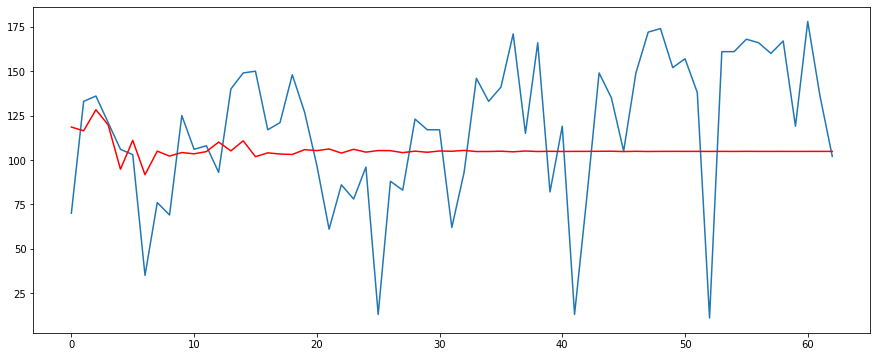

In [127]:

from statsmodels.tsa.ar_model import AR


# split dataset
X = Final_df_md.values
train, test = X[1:len(X)-63], X[len(X)-63:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
error_2 = mean_absolute_error(test, predictions)

print('Absoulte error',error_2)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## For all data of Q1 

In [128]:


frames =[dataset_2015_Q1,dataset_2016_Q1,dataset_2017_Q1,dataset_2018_Q1]
Final_df_all=pd.concat(frames)
Final_df_all.fillna(0, inplace=True)
Final_df_all = pd.DataFrame(Final_df_all.groupby(Final_df_all['starttime'].dt.date).count()['trip_id'])


Final_df_all_md=Final_df_all
#Final_df_md['trip_id'] 


#Final_df_all_md = Final_df_all_md[Final_df_all_md.trip_id <7000]

#Final_df_md.head()
Final_df_all_md.shape
Final_df_all_md.to_excel('Final_df_all_md.xlsx')

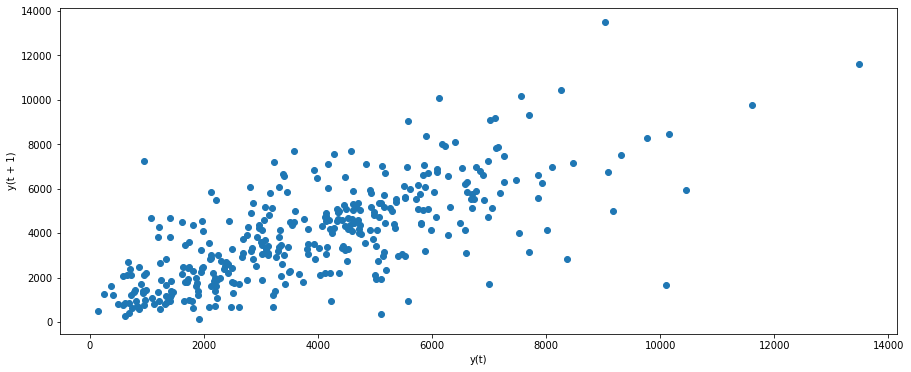

In [129]:
lag_plot(Final_df_all_md)
plt.show()

Lag: 15
Coefficients: [ 6.78769899e+02  6.55894242e-01 -6.34650498e-02  1.20939163e-01
  3.18363843e-02 -4.92200855e-02 -1.71656643e-02  1.86137630e-01
 -5.96254651e-02  4.62531141e-03 -1.06836235e-01  7.98423384e-02
 -1.56306464e-02 -1.31013918e-02  1.97027180e-01 -1.20228123e-01]
predicted=2916.696041, expected=2493.000000
predicted=4373.408865, expected=2416.000000
predicted=3771.854734, expected=2228.000000
predicted=3486.460071, expected=1093.000000
predicted=4988.685538, expected=1076.000000
predicted=2811.268208, expected=4663.000000
predicted=3217.265926, expected=5163.000000
predicted=3776.858356, expected=5173.000000
predicted=4702.389169, expected=4473.000000
predicted=4247.937075, expected=3243.000000
predicted=3615.256180, expected=1420.000000
predicted=4359.668490, expected=1206.000000
predicted=3311.381224, expected=1337.000000
predicted=3403.914409, expected=2852.000000
predicted=3584.951582, expected=3343.000000
predicted=4272.537138, expected=4137.000000
predicted=399

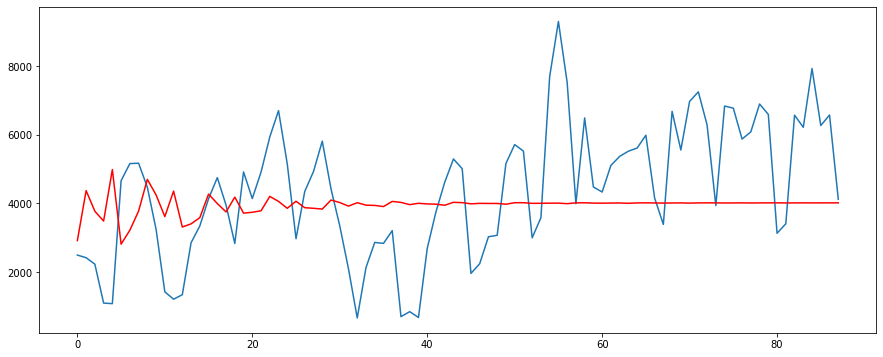

In [130]:

from statsmodels.tsa.ar_model import AR


# split dataset
X = Final_df_all_md.values
train, test = X[1:len(X)-88], X[len(X)-88:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
error_2 = mean_absolute_error(test, predictions)
print('Absoulte error',error_2)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()


In [131]:
Final_df_all_md.shape

(361, 1)

## ARMA model  (data =only Q2 of 2015 stn =35 , prediction= march of 2016 )

In [132]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels as sm

In [133]:
dataset_2016_Q1.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,9080551,2016-03-31 23:53:00,2016-04-01 00:07:00,155,841,344,Ravenswood Ave & Lawrence Ave,458,Broadway & Thorndale Ave,Subscriber,Male,1986.0
1,9080550,2016-03-31 23:46:00,2016-03-31 23:57:00,4831,649,128,Damen Ave & Chicago Ave,213,Leavitt St & North Ave,Subscriber,Male,1980.0
2,9080549,2016-03-31 23:42:00,2016-03-31 23:46:00,4232,210,350,Ashland Ave & Chicago Ave,210,Ashland Ave & Division St,Subscriber,Male,1979.0
3,9080548,2016-03-31 23:37:00,2016-03-31 23:55:00,3464,1045,303,Broadway & Cornelia Ave,458,Broadway & Thorndale Ave,Subscriber,Male,1980.0
4,9080547,2016-03-31 23:33:00,2016-03-31 23:37:00,1750,202,334,Lake Shore Dr & Belmont Ave,329,Lake Shore Dr & Diversey Pkwy,Subscriber,Male,1969.0


In [134]:
df_particular_Stn_16 = dataset_2016_Q1[(dataset_2016_Q1.from_station_id==35)]
filtereddata_2016_Q2 = df_particular_Stn_16[(df_particular_Stn_16.starttime.dt.weekday_name!='Saturday') & (df_particular_Stn_16.starttime.dt.weekday_name!='Sunday')]

data_2016_ = pd.DataFrame(filtereddata_2016_Q2.groupby(filtereddata_2016_Q2['starttime'].dt.date).count()['trip_id'])





In [137]:
data_2016_.iloc[60:,:]

,trip_id
starttime,
2016-03-29,122
2016-03-30,98
2016-03-31,77


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

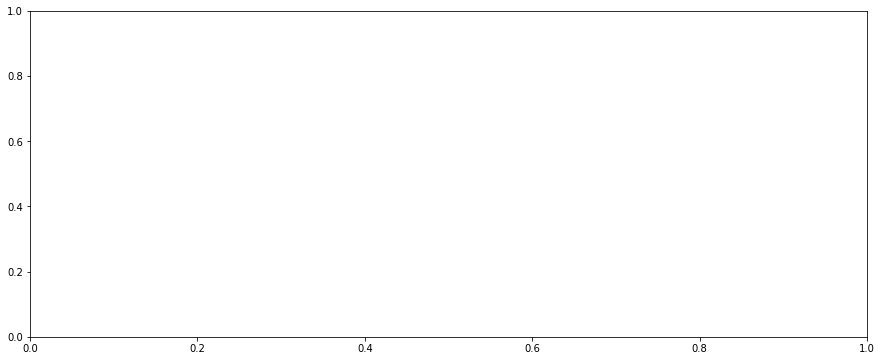

In [136]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
#data_2016_.index = pd.Index(sm.tsa.datetools.dates_from_range('2016-01-01', '2016-03-10'))
#data_2016_.columns = ['checkout']
md_1_AR=ARMA(data_2016_,(1,0)).fit()
#predict_sunspots = md.predict(data_2016_.iloc[70:,:], data_2016_.iloc[90,:], dynamic=True)
#print(predict_sunspots)
md_1_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
#data_2016_.columns = ['checkout']
#data_2016_.index = pd.Index(sm.tsa.datetools.dates_from_range('2016-01-01', '2016-03-10'))
md_2_AR=ARMA(data_2016_,(2,0)).fit()
#predict_sunspots = md.predict(data_2016_.iloc[70:,:], data_2016_.iloc[90,:], dynamic=True)
#print(predict_sunspots)
md_2_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])
data_2016_.columns = ['checkout']
md_3_AR=ARMA(data_2016_,(3,0)).fit()

md_3_AR.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
#md.summary()

In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_1_MA=ARMA(data_2016_,(0,1)).fit()

md_1_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_2_MA=ARMA(data_2016_,(0,2)).fit()

md_2_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_3_MA=ARMA(data_2016_,(0,3)).fit()

md_3_MA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
md_1_AR.summary()

In [ ]:
bic=[]
md_2_AR.summary()



In [ ]:
md_3_AR.summary()

In [ ]:
md_1_MA.summary()

In [ ]:
md_2_MA.summary()

In [ ]:
md_3_MA.summary()

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data_2016_.iloc[70:,:], lags= 10, alpha=0.05)

## ARMA 

In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA=ARMA(data_2016_ ,(1,1)).fit()

md_ARMA.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()


In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_12=ARMA(data_2016_ ,(1,2)).fit()

md_ARMA_12.plot_predict(start='2015-06-24', end='2015-06-30')
plt.show()

In [ ]:
data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_21=ARMA(data_2016_ ,(2,1)).fit()

md_ARMA_21.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()

In [ ]:
#data_2016_ = pd.DataFrame(dataset_2016_Q1.groupby(dataset_2016_Q1['starttime'].dt.date).count()['trip_id'])

md_ARMA_22=ARMA(data_2016_ ,(2,2)).fit()

md_ARMA_22.plot_predict(start='2015-06-24', end='2015-06-30')
plt.xlabel('Test Data for June 2015 Last Week')
plt.ylabel('Number of Checkouts')
plt.title('For station Streeter Dr & Illinois St')
plt.show()

In [ ]:
data_2016_.shape

In [ ]:
md_ARMA.summary()

In [ ]:
aic = []
aic.append(md_1_AR.aic)
aic.append(md_2_AR.aic)
aic.append(md_3_AR.aic)
aic.append(md_1_MA.aic)
aic.append(md_2_MA.aic)
aic.append(md_3_MA.aic)
aic.append(md_ARMA.aic)
#aic.append(md_ARMA_12.aic)
aic.append(md_ARMA_21.aic)
aic.append(md_ARMA_22.aic)

In [ ]:
bic=[]
bic.append(md_1_AR.bic)
bic.append(md_2_AR.bic)
bic.append(md_3_AR.bic)
bic.append(md_1_MA.bic)
bic.append(md_2_MA.bic)
bic.append(md_3_MA.bic)
bic.append(md_ARMA.bic)
#bic.append(md_ARMA_12.bic)
bic.append(md_ARMA_21.bic)
bic.append(md_ARMA_22.bic)


In [ ]:
aic

In [ ]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
#x = np.arange(2,20,2)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21','ARMA22']

fig, ax = plt.subplots(1,1) 
ax.plot(x,aic)
ax.set_xlabel("Model")
ax.set_ylabel("Akaike Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)

In [ ]:
#xtickslabel=[AR2,AR3,MA1,MA2,MA3,ARMA11]
x = np.arange(2,20,2)
#plt.xticks(np.arange(1,20,2), ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA12','ARMA21','ARMA22'])
x_ticks_labels = ['AR1','AR2','AR3','MA1','MA2','MA3','ARMA11','ARMA21','ARMA22']

fig, ax = plt.subplots(1,1) 
ax.plot(x,bic)
ax.set_xlabel("Model")
ax.set_ylabel("Bayesian Information Criterion")
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.set_xticklabels(x_ticks_labels, rotation='vertical', fontsize=18)


In [ ]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
def modelARIMA(train,test,p,q,d):
    model = ARIMA(train, order=(p,q,d))  
    
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(test.shape[0], alpha=0.3)  # 95% conf
    
    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    return fc,fc_series
def auto_arima(df):
    smodel = pm.auto_arima(df, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)



    print(smodel.summary())
    return smodel

In [ ]:
# Create Training and Test
train = data_2016_[:60]
test = data_2016_[60:]
fc,fc_series = modelARIMA(train,test,2,1,1)
auto_arima(data_2016_)
print("R square:",r2_score(test.values,fc))
print("MEan Absolute error:",mean_absolute_error(test.values,fc))

In [ ]:
data_2016_.head()